## Hypothesis testing; expample using the Central Limit Theorem

In this notebook we will simulate simple "experiments" in which we "roll" a fair six-sided die,
and record the number that comes up.  The probabilities for the 6 discrete outcomes for the rolling of a die (1, 2, 3, 4, 5, 6) are all $\frac{1}{6}$.  We will look at
+ the statistical properties of the parent distribution for the results of a single roll
+ the distribution of the averages or large numbers of rolls

Finally, we will compare the results of the distribution of averages with the predictions of the 
Central Limit Theorem.

In [2]:
import numpy as np
from scipy import stats

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

#### Mean of parent distribution

$$ \bar{x}_{\rm parent} = \sum_{i=1}^6 i\,p_i $$

In [21]:
p_vals = np.array([1/6 for i in range(6)])
print(p_vals)
i_vals = np.array([i for i in range(1,7)])
print(i_vals)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[1 2 3 4 5 6]


In [22]:
mean_parent = np.sum(i_vals*p_vals)
print(mean_parent)

3.5


#### Variance of parent distribution

$$ \sigma^2_{\rm parent} = \frac{1}{6}\sum_{i=1}^6 (i-\bar{x}_{\rm parent})^2     $$ 

In [46]:
var_parent = np.sum((i_vals - mean_parent)**2)/6
print(var_parent)

# OR

var_parent = np.var(i_vals - mean_parent)
print(var_parent)

2.9166666666666665
2.9166666666666665


#### Sampling from a uniform probability distribution

In [9]:
data = stats.uniform.rvs(size=1000)
print(np.mean(data), np.std(data))

0.5090224606625686 0.2935369295984431


<IPython.core.display.Javascript object>


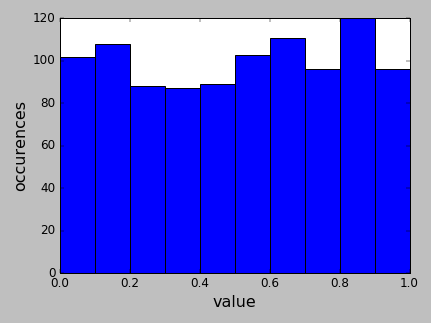

In [10]:
low = 0.0
high = 1.
nbins = 10
plt.figure()
plt.xlabel("value")
plt.ylabel("occurences")
out = plt.hist(data, nbins, [low,high])
#out[0],out[1]    # occurrences and bin boundaries

In [16]:
n_trials = 100
n_avg = 2
data = np.zeros(n_trials)
for i in range(n_trials):
    data[i] = np.sum(stats.uniform.rvs(size=n_avg))/n_avg
#print(data)

<IPython.core.display.Javascript object>


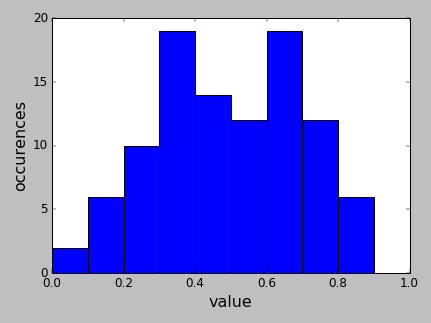

In [17]:
low = 0.0
high = 1.
nbins = 10
plt.figure()
plt.xlabel("value")
plt.ylabel("occurences")
out = plt.hist(data, nbins, [low,high])

#### Mean and standard deviation of single experiment with 100 trials
(Consistent with $\bar{x}_{\rm parent}$ and $\sigma^2_{\rm parent}$)

<IPython.core.display.Javascript object>


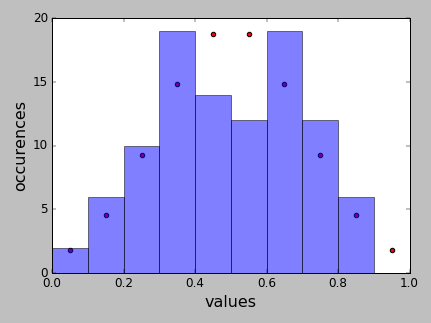

In [20]:
plt.figure()
plt.xlabel("values")
plt.ylabel("occurences")
h_out = plt.hist(data, nbins, [low,high], alpha = 0.5)
plt.xlim(low,high);

x = np.zeros(len(h_out[1])-1)   # Create array for mid-points of histogram bins
y = np.zeros(len(h_out[1])-1)   # Create array for expected occurences from normal dist.
for i in range(len(x)):
    x[i] = (h_out[1][i+1] + h_out[1][i])/2
    y[i] = n_trials*(stats.norm.cdf(h_out[1][i+1],0.5,1/np.sqrt(12.)/np.sqrt(n_avg))\
                    - stats.norm.cdf(h_out[1][i],0.5,1/np.sqrt(12.)/np.sqrt(n_avg)))
    
plt.scatter(x, y, c = 'red');

In [32]:
np.mean(data)

3.35

In [33]:
np.var(data)

2.8875

#### Repeat entire experiment many times, and collect averages

In [50]:
n_expt = 10000
results = np.zeros(n_expt)

for i in range(n_expt):
    data = stats.randint.rvs(1, 7, size=n_rolls)
    results[i] = np.mean(data)

<IPython.core.display.Javascript object>


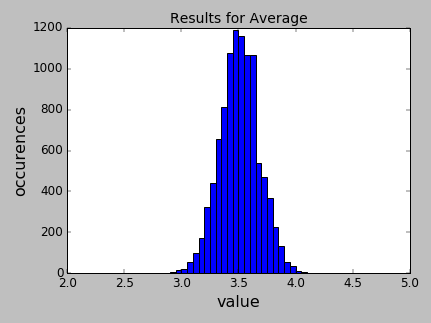

In [55]:
nbins = 40
low = 2.5
high = 4.5
plt.figure()
plt.xlabel("value")
plt.ylabel("occurences")
plt.title("Results for Average")
plt.xlim(2,5)
out = plt.hist(results, nbins, [low,high])
#out[0],out[1]    # occurrences and bin boundaries

### Central Limit Theorem

The distribution of averages in the histogram above looks like it's approaching 
a gaussian distribution.  Let's check the prediction the Central Limit Theorem.

#### Mean and standard deviation of averages

In [56]:
print("Mean of all of the averages =", np.mean(results))

Mean of all of the averages = 3.501921


In [44]:
print("Standard deviation of all of the averages =", np.std(results))

Standard deviation of all of the averages = 0.17137700866802408


#### Prediction of Central Limit Theorem

$$ \sigma_{\rm sample} \simeq \frac{\sigma_{\rm parent}}{\sqrt{N}}   $$

In [57]:
prediction = np.sqrt(var_parent)/np.sqrt(n_rolls)
print("prediction from Central Limit Theorem for sample standard deviation =", prediction)

prediction from Central Limit Theorem for sample standard deviation = 0.1707825127659933
